In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/machineLearningTerapan/diabetes_prediction_dataset.csv')

In [4]:
data.shape

(100000, 9)

In [5]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Eksploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


##Cleaning Data

membersihkan data dari data null, duplikat dan data pencilan

### check missing value

In [8]:
data_null = data.isnull().sum()
print(data_null)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### handling duplicated

In [9]:
data_duplicated = data[data.duplicated()]
data_duplicated

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(96146, 9)

### check outlier setiap kolom

<Axes: xlabel='age'>

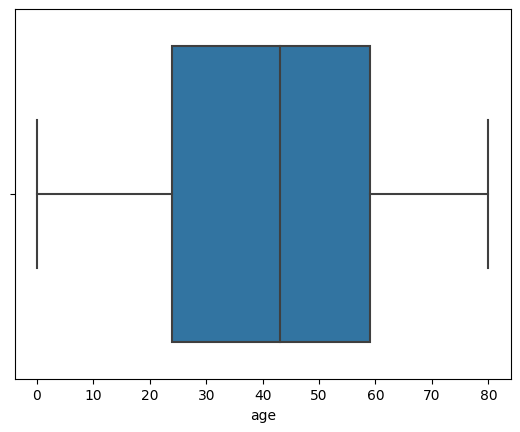

In [12]:
sns.boxplot(x=data.age)

<Axes: xlabel='bmi'>

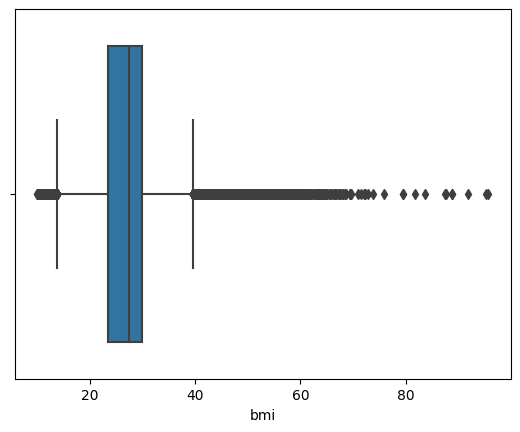

In [13]:
sns.boxplot(x=data.bmi)

data outlier pada data BMI bisa disebabkan karena banyakknya orang yang mengalami obesitas

<Axes: xlabel='HbA1c_level'>

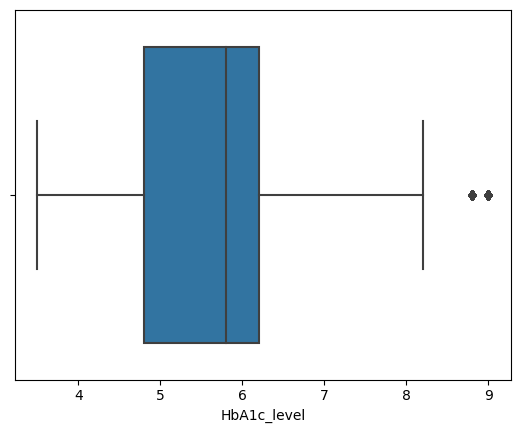

In [14]:
sns.boxplot(x=data.HbA1c_level)

<Axes: xlabel='blood_glucose_level'>

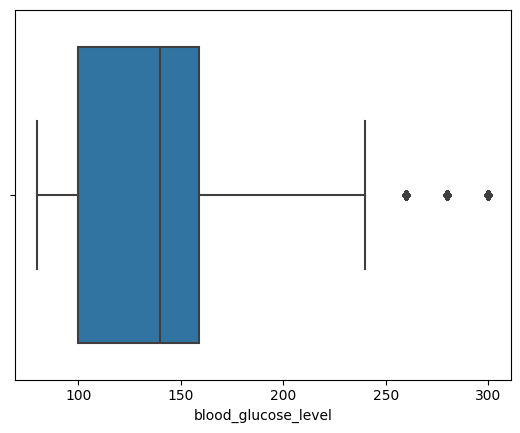

In [15]:
sns.boxplot(x=data.blood_glucose_level)

##Univariate Analysis

menganalisis data pada bagian kolom tunggal untuk mendapat insight dari data

In [16]:
numerical_features = ['age','bmi','HbA1c_level','blood_glucose_level']
categorical_features = ['gender','hypertension','heart_disease','smoking_history']

###Categorical features

        jumlah sampel  persentase
Female          56161        58.4
Male            39967        41.6
Other              18         0.0


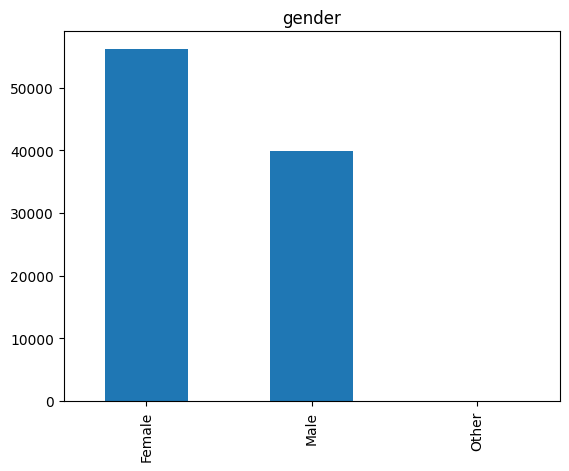

In [17]:
## fitur gender
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [18]:
data = data[data['gender'] != 'Other']

        jumlah sampel  persentase
Female          56161        58.4
Male            39967        41.6


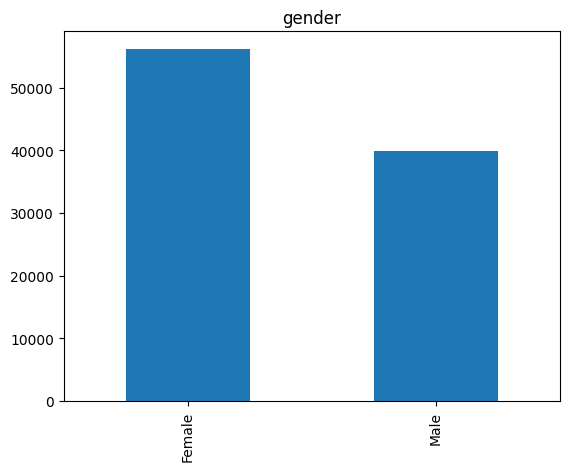

In [19]:
## fitur gender
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
0          88667        92.2
1           7461         7.8


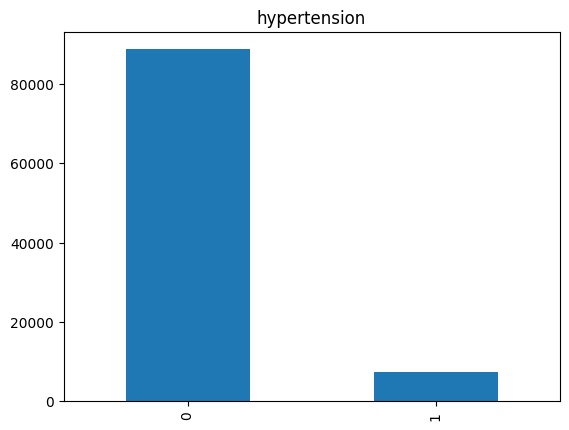

In [20]:
## fitur hypertension
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
0          92205        95.9
1           3923         4.1


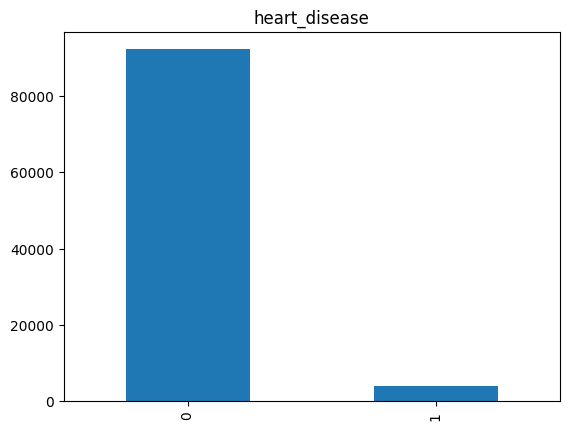

In [21]:
## fitur heart disase
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

             jumlah sampel  persentase
never                34395        35.8
No Info              32881        34.2
former                9299         9.7
current               9197         9.6
not current           6359         6.6
ever                  3997         4.2


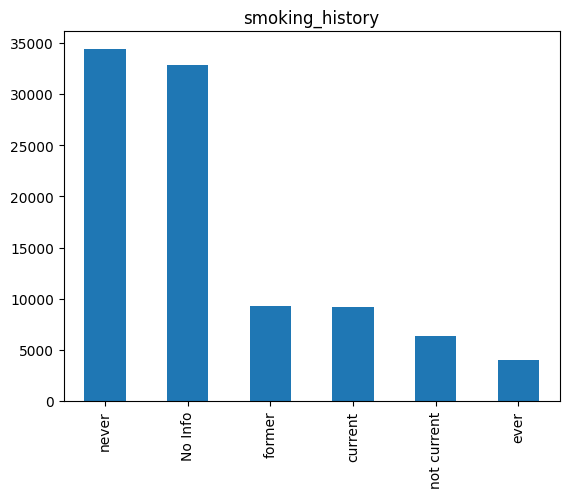

In [22]:
## fitur smoking history
feature = categorical_features[3]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
0          87646        91.2
1           8482         8.8


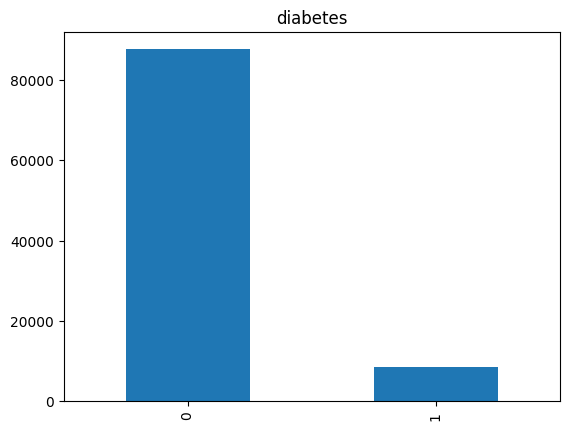

In [23]:
## diabetes
feature = 'diabetes'
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Numerical features

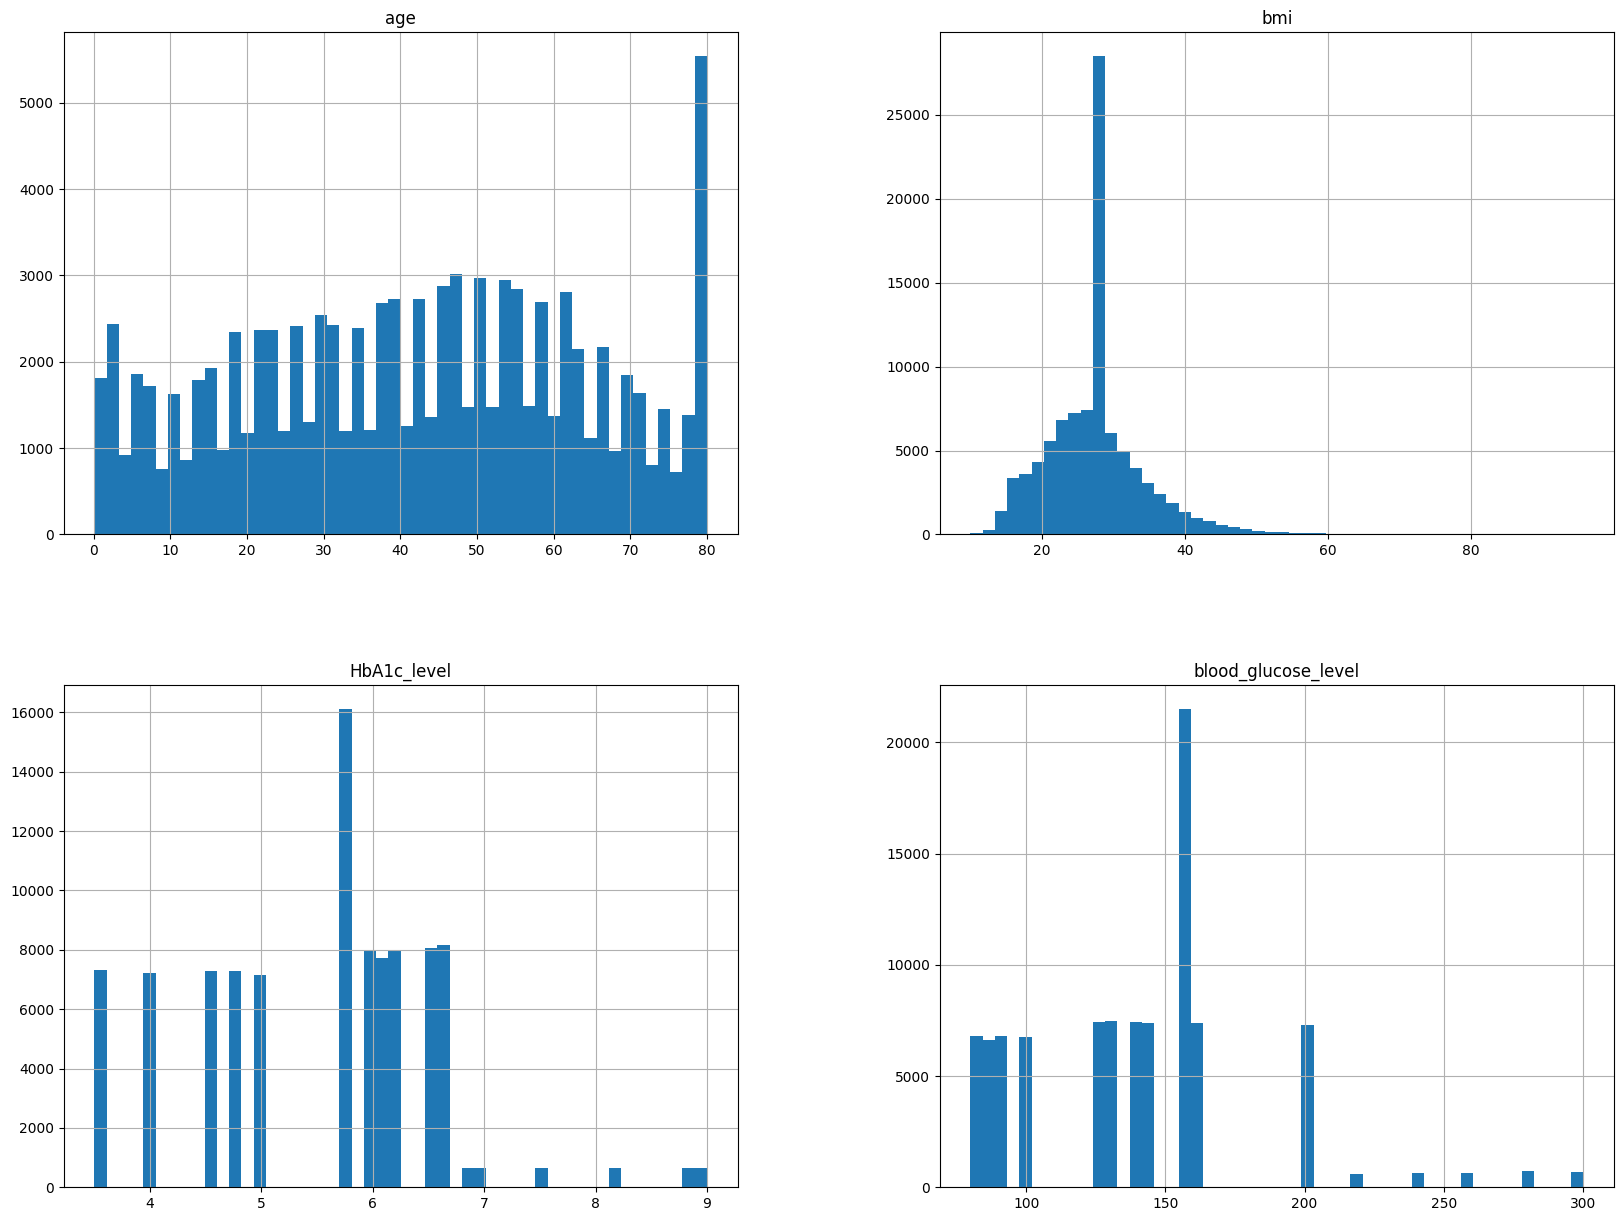

In [24]:
data[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

melihat hubungan atau korelasi antara variabel yang ada dengan resiko terkena diabetes

### Categorical features

In [25]:
# fungsi untuk melihat korelasi sebuah fitur terhadap target
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of diabetes=1 per category value
    cat_perc = data[[feature, 'diabetes']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='diabetes', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='diabetes', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of diabetes with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

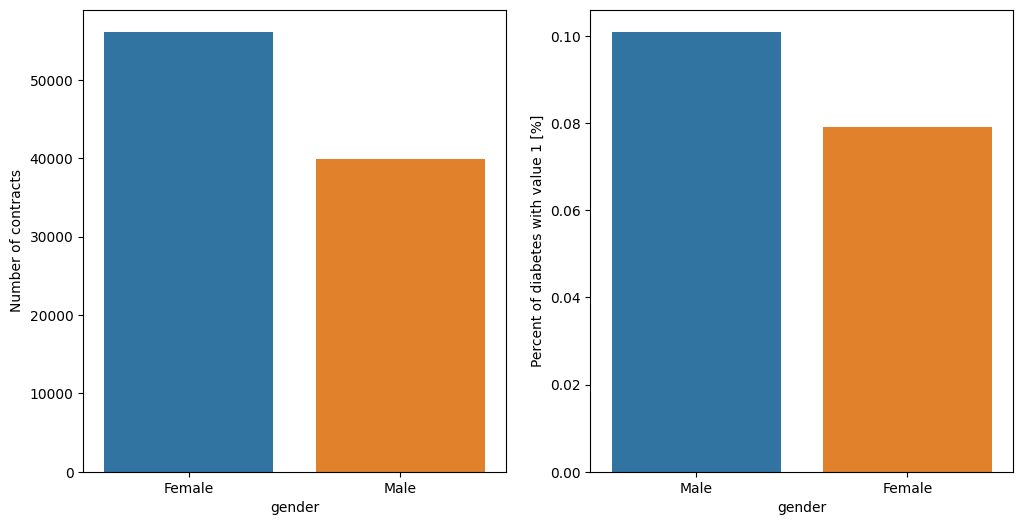

In [26]:
plot_stats('gender')

pria memiliki resiko terkena diabetes lebih tinggi dari wanita sebesar 0.02%

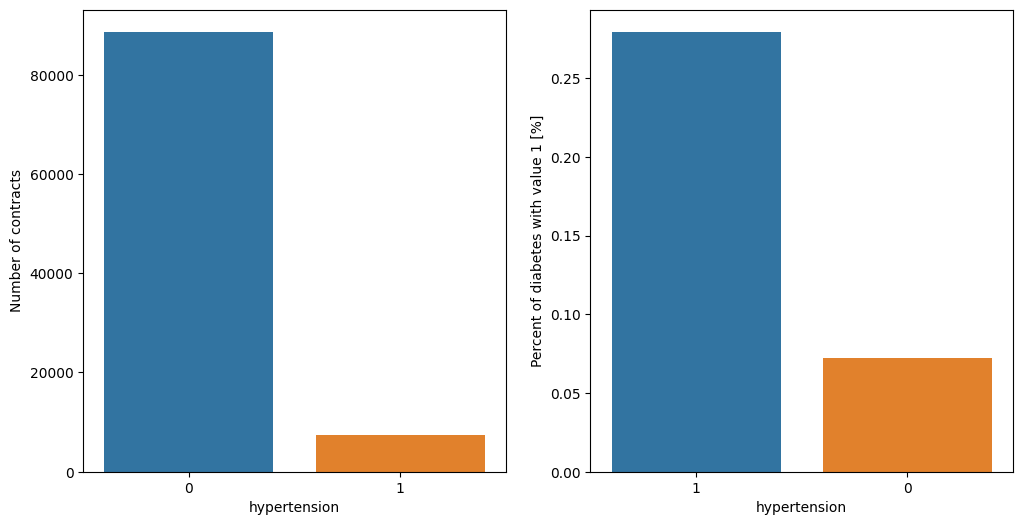

In [27]:
plot_stats('hypertension')

tekanan darah tinggi memiliki resiko terkena diabetes lebih dari 20% dari yang tidak mengalami darah tinggi

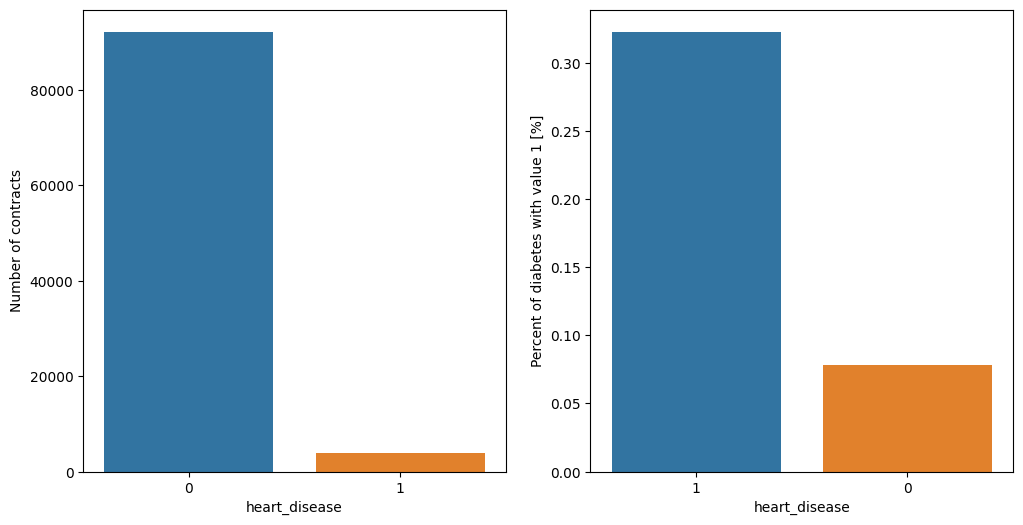

In [28]:
plot_stats('heart_disease')

riwayat kesehatan seperti penyakit jantung, darah tinggi memiliki resiko 0.27% - 0.32% terkena diabetes.

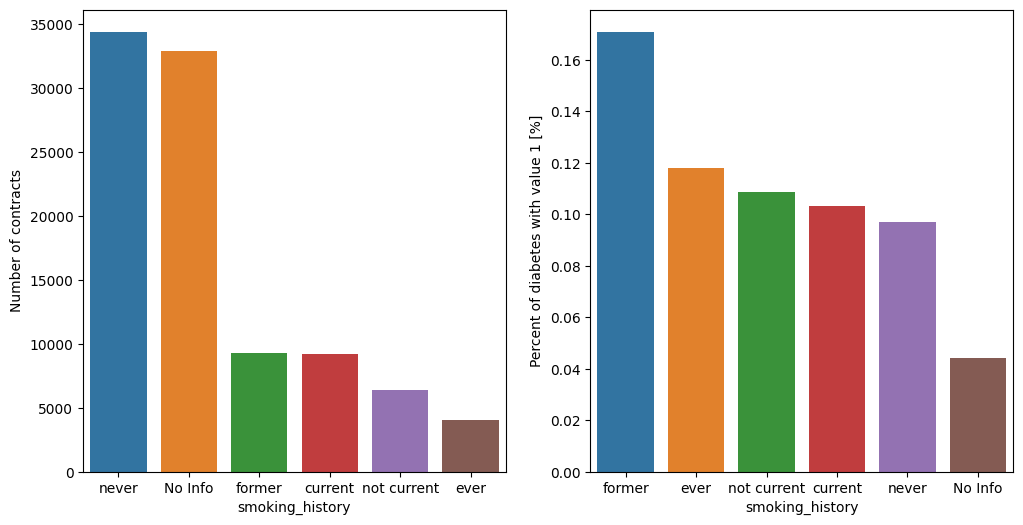

In [29]:
plot_stats('smoking_history')

merokok juga bisa meningkatkan resiko terkena diabetes, seperti mamtan perokok memiliki resiko 0.17%

###Numerical features

<ipython-input-30-5ff959f2f38a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

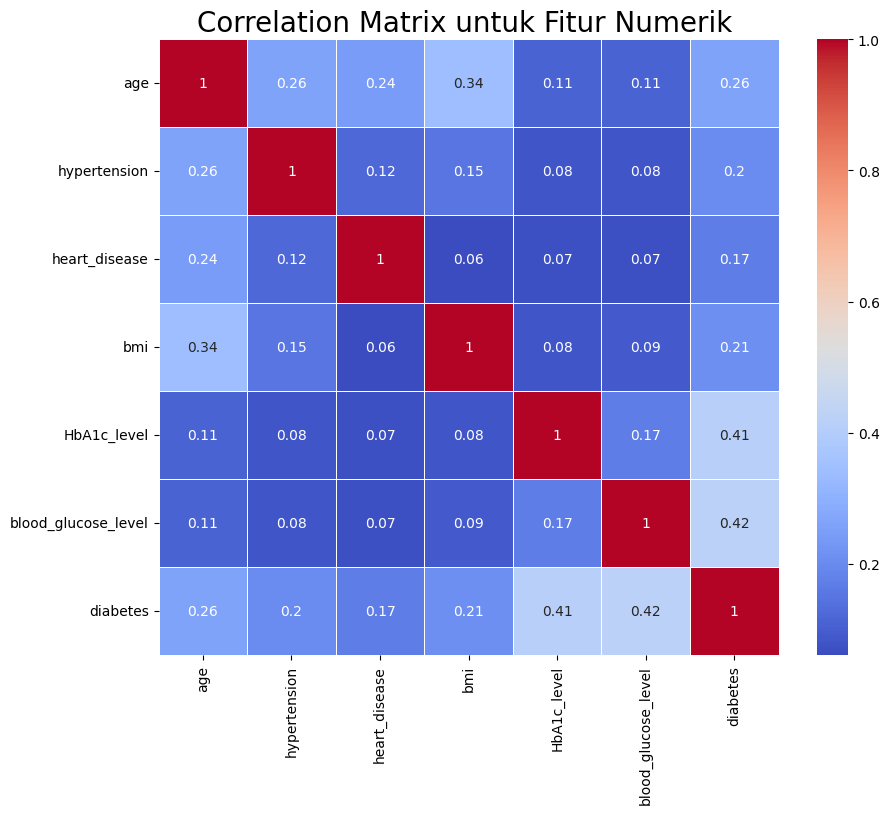

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

HbA1c_level dan blood_glucose_level memiliki korelasi yang tinggi terhadap resiko diabetes sebanyak 41% - 42%

# data preparation

mempersiapkan data untuk proses train. data kategorikal yang memiliki nilai unik lebih dari 2 akan dilakukan onHotEncoding dan data yang memiliki 2 nilai unik akan dilakuan label encoder

## Encoding Categorical Feature

In [31]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender_encoded'] = label_encoder.fit_transform(data['gender'])

In [33]:
from sklearn.preprocessing import  OneHotEncoder
data = pd.concat([data, pd.get_dummies(data['smoking_history'], prefix='smoking_history')],axis=1)
data.drop(['gender','smoking_history'], axis=1, inplace=True)
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender_encoded,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0


## Train test split

membagi data menjadi train dan test, untuk data test diambila 10% dari keseluruhan data

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop(["diabetes"],axis =1)
y = data["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [35]:
print(f'Total sample in whole dataset: {len(X)}')
print(f'Total sample in train dataset: {len(X_train)}')
print(f'Total sample in test dataset: {len(X_test)}')

Total sample in whole dataset: 96128
Total sample in train dataset: 86515
Total sample in test dataset: 9613


## standarisasi

melakukan scaling data dengan menggunakan standar scalerm dengan tujuan untuk menghemat komputasi dan meninggkatkan peforma model

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,bmi,HbA1c_level,blood_glucose_level
16356,0.053755,0.609033,0.994577,0.043113
26264,1.344384,-0.173533,0.528536,0.409887
76682,-1.192370,1.370927,0.994577,0.532145
84619,0.142764,-0.241454,0.435327,-0.934953
55238,-0.925343,1.069713,0.621744,1.510211


#Modelling

menggunakan 3 model machine learning, KNN Random Forest dan Boosting Algorithm

## K-Nearest Neighbor

In [37]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## random forest

In [39]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## boosting algorithm

In [40]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

#evaluasi model

In [41]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## matriks evaluasi mse

menghitung peforma model menggunakan mse

In [42]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.000026,0.000035
RF,0.000015,0.000027
Boosting,0.000028,0.00003


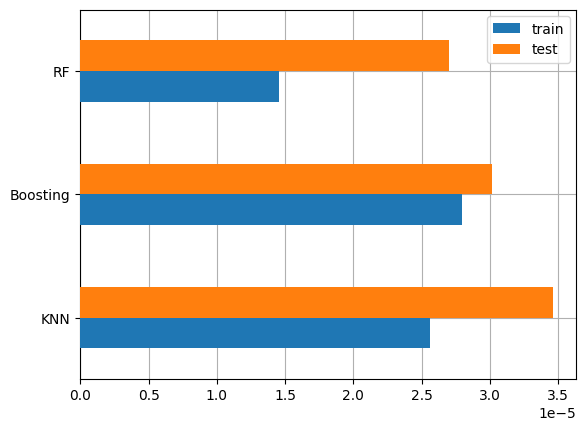

In [43]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## matriks evaluasi roc-auc

menghitung peforma model menggunakan kurfa ROC-AUC

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve

In [45]:
y_pred_knn = knn.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_knn)
print(f'KNN AUC-ROC Score: {roc_auc:.4f}')

KNN AUC-ROC Score: 0.9261


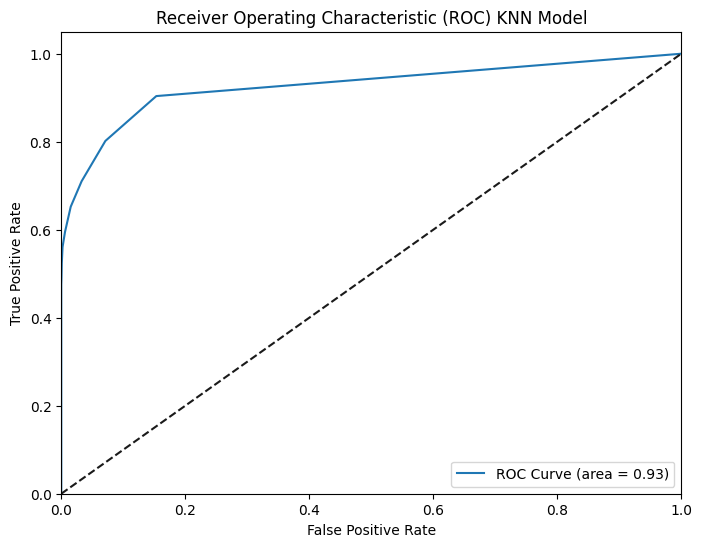

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) KNN Model')
plt.legend(loc='lower right')
plt.show()


In [47]:
y_pred_RF = RF.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_RF)
print(f'RF AUC-ROC Score: {roc_auc:.4f}')

RF AUC-ROC Score: 0.9730


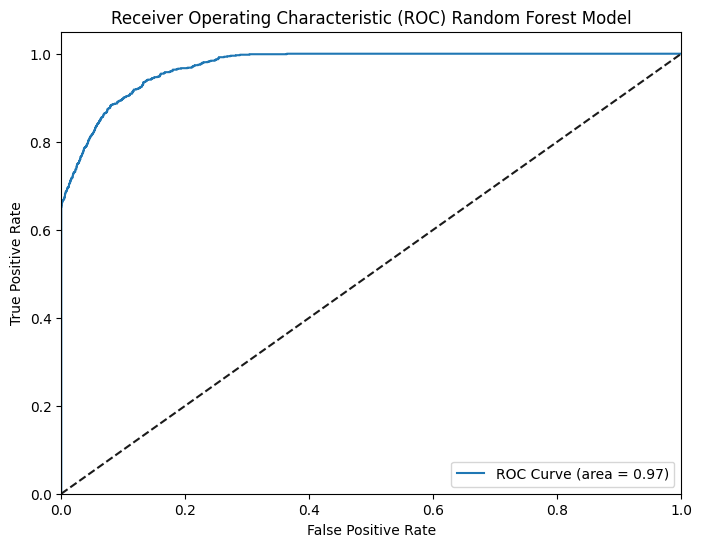

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Random Forest Model')
plt.legend(loc='lower right')
plt.show()

In [49]:
y_pred_boost = boosting.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_boost)
print(f'Boost AUC-ROC Score: {roc_auc:.4f}')

Boost AUC-ROC Score: 0.9618


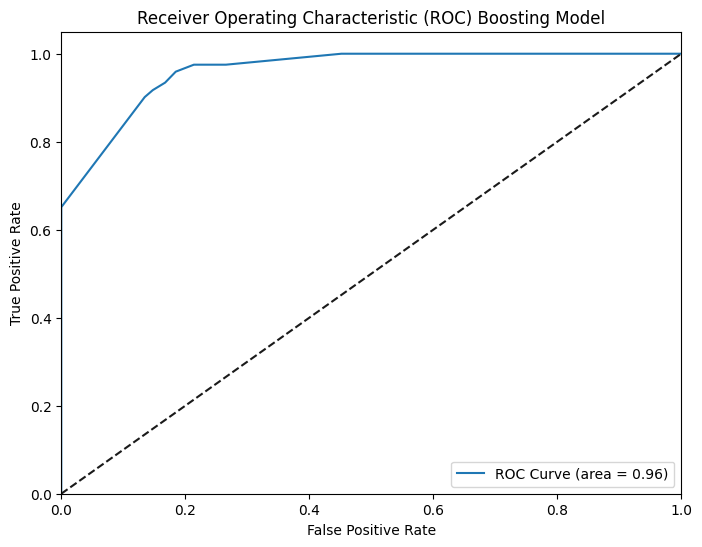

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_boost)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Boosting Model')
plt.legend(loc='lower right')
plt.show()

## Tes prediksi

In [51]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
2547,0,0.0,0.0,0.0
